<a href="https://colab.research.google.com/github/rsudiplive/Complete_regression_analysis_CAR_DEKHO_kaggle/blob/main/Detailed_Regression_Analysis_Car_Dekho_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import mean

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car_dekho_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dat/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
car_dekho_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car_dekho_df.shape

(4340, 8)

The dependent variable is the selling_price and the other features will be used as independent variables for modelling at the end

In [ ]:
car_dekho_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
car_dekho_df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
#checking for duplicated records in the dataset
len(car_dekho_df[car_dekho_df.duplicated()])

763

In [ ]:
#let's remove the duplicate records from the dataset as a part of data cleaning step
car_dekho_df.drop_duplicates(keep=False,inplace=True)
len(car_dekho_df[car_dekho_df.duplicated()])

0

In [ ]:
#checking the info of the dataset after removing the duplicate records from the datset
car_dekho_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 26 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3051 non-null   object
 1   year           3051 non-null   int64 
 2   selling_price  3051 non-null   int64 
 3   km_driven      3051 non-null   int64 
 4   fuel           3051 non-null   object
 5   seller_type    3051 non-null   object
 6   transmission   3051 non-null   object
 7   owner          3051 non-null   object
dtypes: int64(3), object(5)
memory usage: 214.5+ KB


In [ ]:
car_dekho_df.shape

(3051, 8)

In [ ]:
car_dekho_df['name'].value_counts()

Maruti Swift Dzire VDI               49
Maruti Alto 800 LXI                  39
Maruti Alto LXi                      37
Maruti Swift VDI BSIV                27
Maruti Alto LX                       25
                                     ..
Renault Pulse RxZ Optional            1
Datsun RediGO 1.0 S                   1
Mahindra Xylo H8 ABS with Airbags     1
OpelCorsa 1.4 GL                      1
Hyundai i20 Asta Option 1.2           1
Name: name, Length: 1354, dtype: int64

In [ ]:
car_dekho_df['owner'].value_counts()

First Owner             1813
Second Owner             876
Third Owner              275
Fourth & Above Owner      70
Test Drive Car            17
Name: owner, dtype: int64

In [ ]:
car_dekho_df['transmission'].value_counts()

Manual       2804
Automatic     247
Name: transmission, dtype: int64

In [ ]:
car_dekho_df['seller_type'].value_counts()

Individual          2476
Dealer               554
Trustmark Dealer      21
Name: seller_type, dtype: int64

In [ ]:
car_dekho_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# **Exploratory Data Analysis(EDA)**

**Univariate Analysis:**

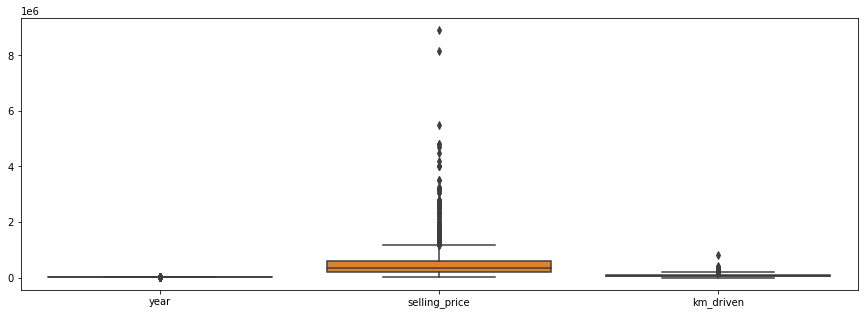

In [ ]:
# Year
plt.figure(figsize = (15,5))
sns.boxplot(data=car_dekho_df)
plt.show()

Looks there's upper range outliers in the year column and we'll try to remove those

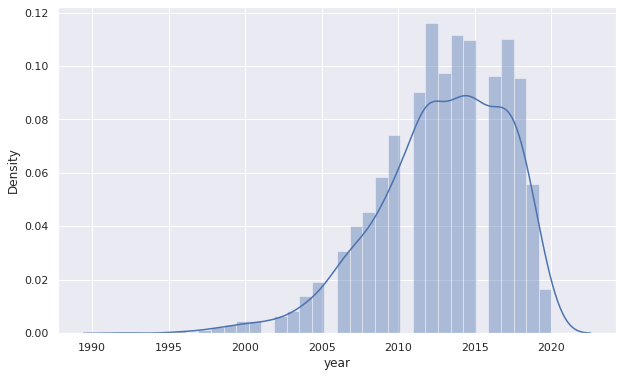

In [ ]:
#distplot ,year
# f,ax=plt.subplots(figsize=(8,6))
sns.set(rc={"figure.figsize": (10, 6)})
sns.distplot(car_dekho_df['year'],hist=True)

The year variable is left skewed with outliers. Also it doesn't have a normal distribution


In [ ]:
#skewness and kurtosis
print("Skewness: %f" % car_dekho_df['year'].skew())
print("Kurtosis: %f" % car_dekho_df['year'].kurt())

Skewness: -0.762911
Kurtosis: 0.627951


If the peak of the distributed data was right of the average value indicating negative skew. This would mean that the cars were being sold for more than the average value.

Let's also check the individual box plot for **year**

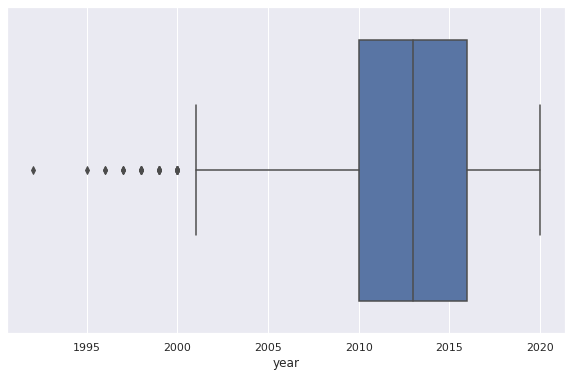

In [ ]:
sns.boxplot(car_dekho_df['year'])

Let's also check the numerical column: **km_driven**

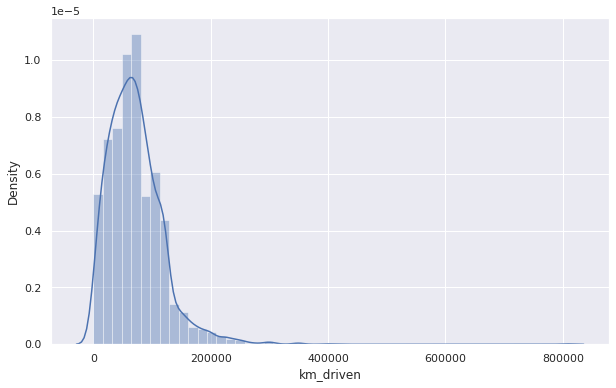

In [ ]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.distplot(car_dekho_df['km_driven'],hist=True)

Looks the km_driven is right skewed.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % car_dekho_df['year'].skew())
print("Kurtosis: %f" % car_dekho_df['year'].kurt())

Skewness: -0.762911
Kurtosis: 0.627951


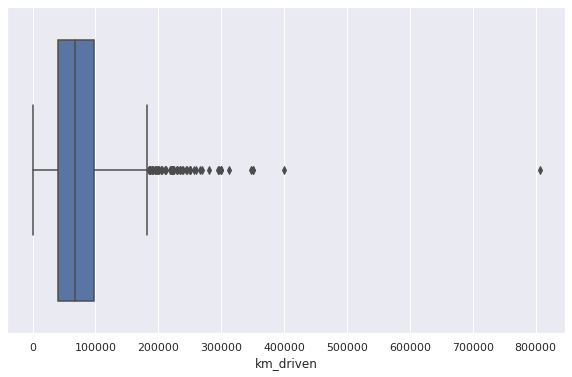

In [ ]:
sns.boxplot(car_dekho_df['km_driven'])

The km_driven column also contains upperrange outliers nd we can remove them in outlier treatment step going forward.

Now also let's have a look at the dependent variable which is the **selling_price**

The selling_price column also contains outliers and we'll have to have a fair treatment in removing those from the dataset.

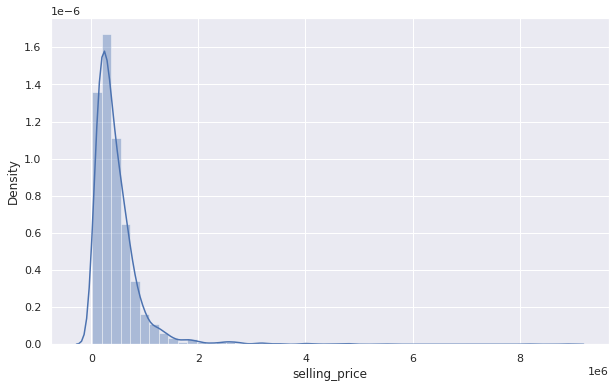

In [ ]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.distplot(car_dekho_df['selling_price'],hist=True)

The **selling_price** column is also right-skewed having longer tails on the right side of the distribution with possibly higher range outliers.

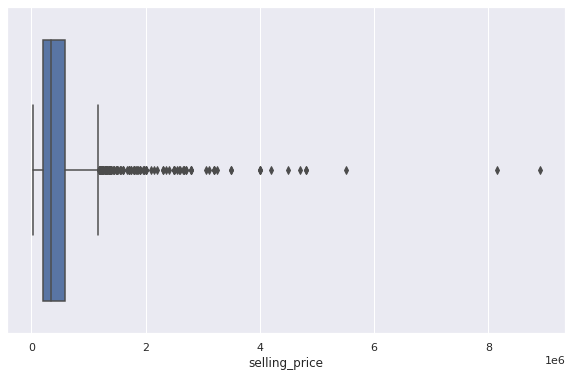

In [ ]:
sns.boxplot(car_dekho_df['selling_price'])

# Outlier treatment:

In [ ]:
Q1 = car_dekho_df.quantile(0.25)
Q3 = car_dekho_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                  6.0
selling_price    390000.0
km_driven         56993.5
dtype: float64


In [ ]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

Let's first work for **km_driven**!

In [ ]:
lower_bound,upper_bound = outlier_treatment(car_dekho_df['km_driven'])
print(upper_bound)
print(lower_bound)

182483.75
-45490.25


In [ ]:
#looking at the low and upper range outliers
car_dekho_df[(car_dekho_df['km_driven'] < lower_bound) | (car_dekho_df['km_driven'] > upper_bound)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
70,Toyota Corolla Altis Diesel D4DG,2011,350000,230000,Diesel,Individual,Manual,First Owner
197,Mahindra Xylo E4,2009,229999,230000,Diesel,Individual,Manual,Third Owner
269,Maruti Alto LXi,2007,100000,195000,Petrol,Individual,Manual,First Owner
324,Mahindra XUV500 W8 2WD,2012,850000,212814,Diesel,Dealer,Manual,First Owner
...,...,...,...,...,...,...,...,...
3994,Tata Indica GLS BS IV,2010,75000,300000,Petrol,Individual,Manual,Third Owner
4088,Maruti 800 AC,2009,120000,250000,Petrol,Individual,Manual,Second Owner
4208,Toyota Qualis FS B3,2001,150000,256000,Diesel,Dealer,Manual,First Owner
4231,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2011,800000,230000,Diesel,Individual,Manual,First Owner


In [ ]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively
car_dekho_df_mod = car_dekho_df[(car_dekho_df['km_driven']>lower_bound) & (car_dekho_df['km_driven']<upper_bound)]

In [ ]:
car_dekho_df_mod

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
26,Maruti Ciaz VXi Plus,2015,585000,24000,Petrol,Dealer,Manual,First Owner
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,Diesel,Individual,Manual,Second Owner
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


Now Let's check the distribution and boxplot of this modified dataframe

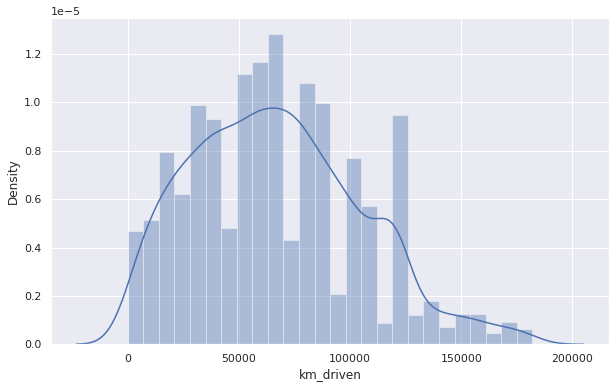

In [ ]:
sns.distplot(car_dekho_df_mod['km_driven'])
plt.show()

The distribution now looks pretty good with a normal distribution.

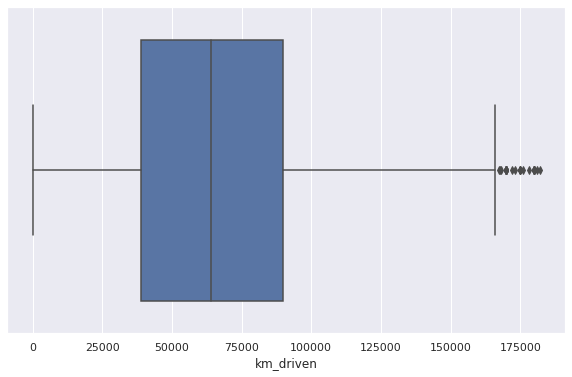

In [ ]:
sns.boxplot(car_dekho_df_mod['km_driven'])

Well, this is what we're looking for! 

Let's now look at the dependent variable selling_price

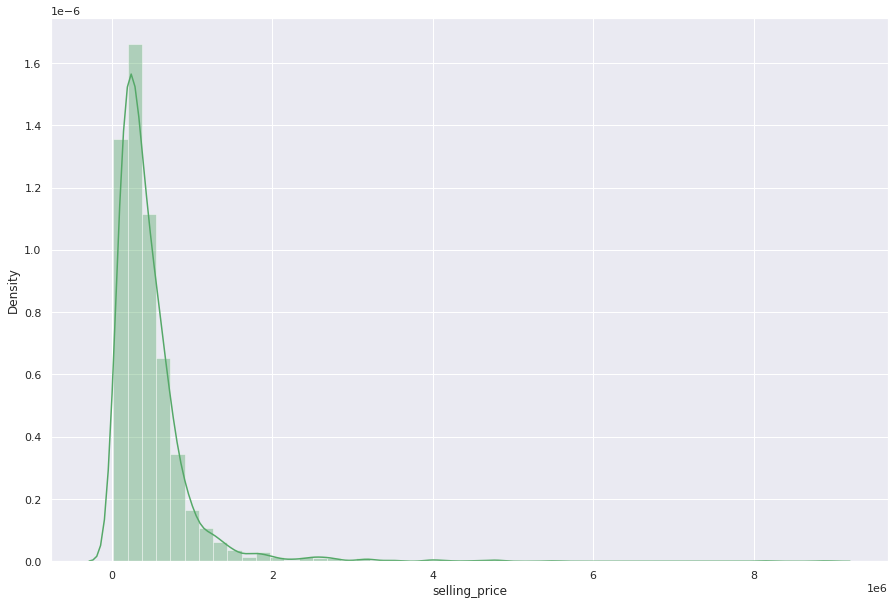

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(car_dekho_df_mod['selling_price'],color="g")

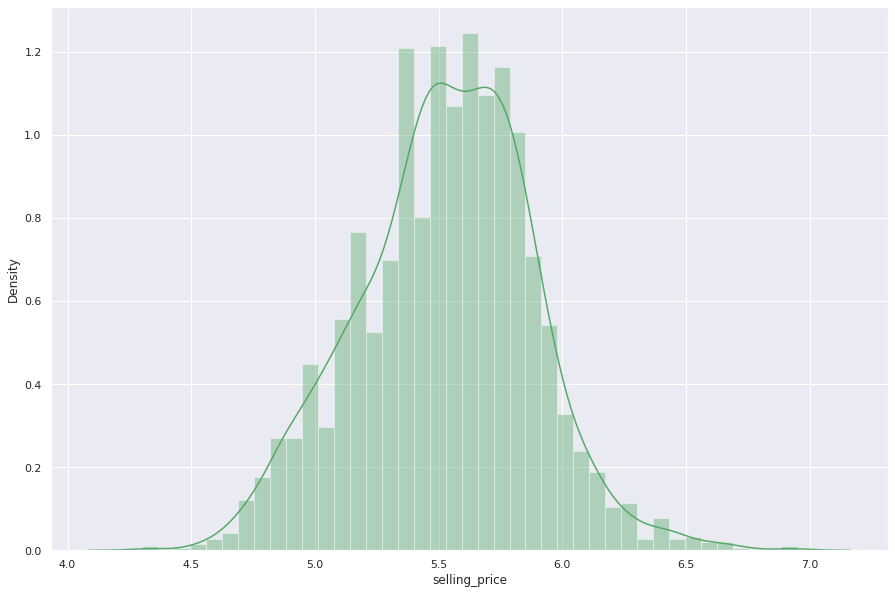

In [ ]:
#log tranformation of the feature and checking the distribution
plt.figure(figsize=(15,10))
sns.distplot(np.log10(car_dekho_df_mod['selling_price']),color="g")

In [ ]:
numeric_features = ['selling_price','year','km_driven']

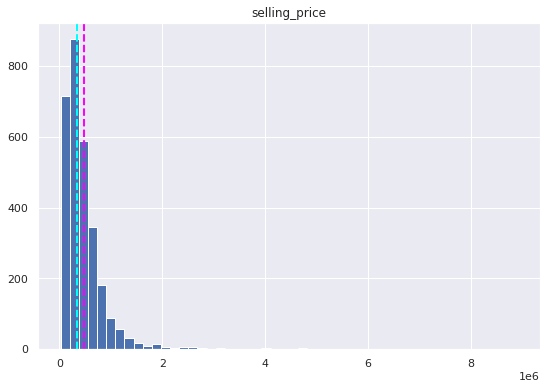

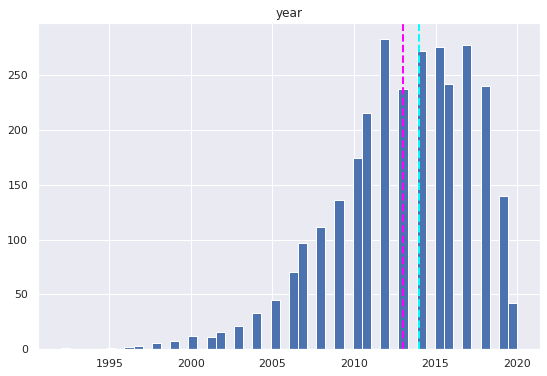

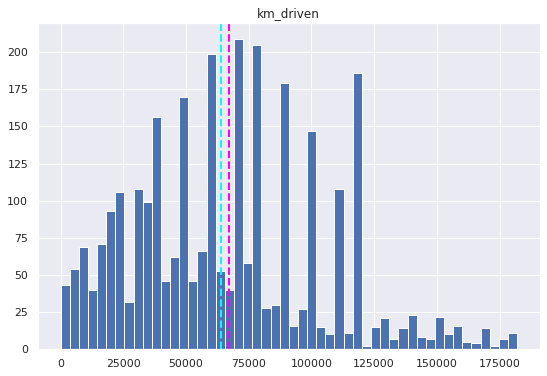

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = car_dekho_df_mod[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

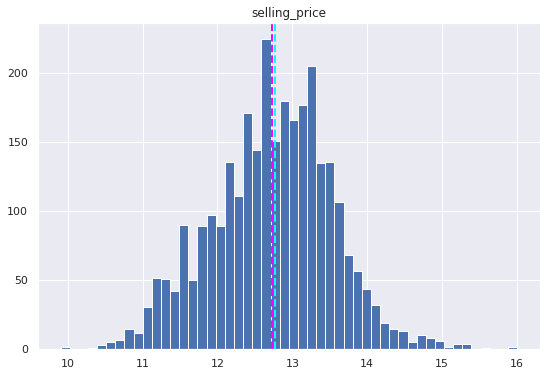

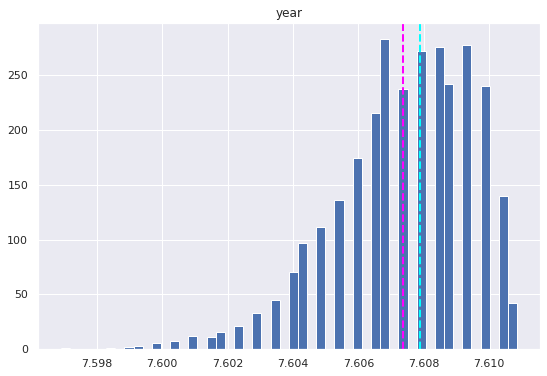

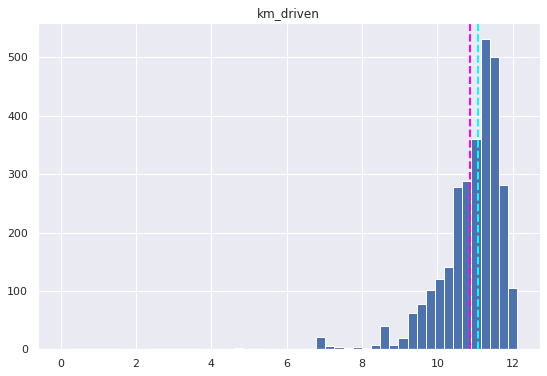

In [ ]:
# Log transformation:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(car_dekho_df_mod[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Let's have a check on the categorical cols and their counts!

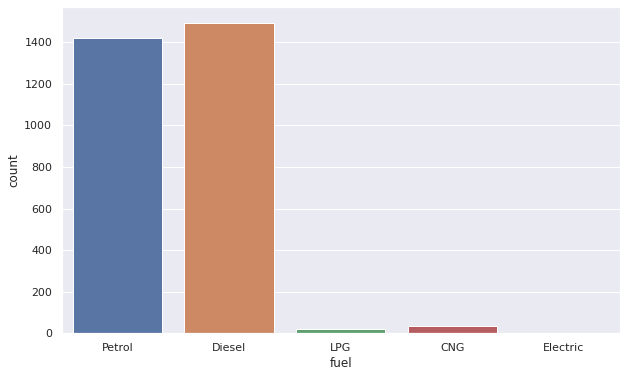

In [ ]:
#fuel type:
sns.countplot(car_dekho_df_mod['fuel'])
plt.show()

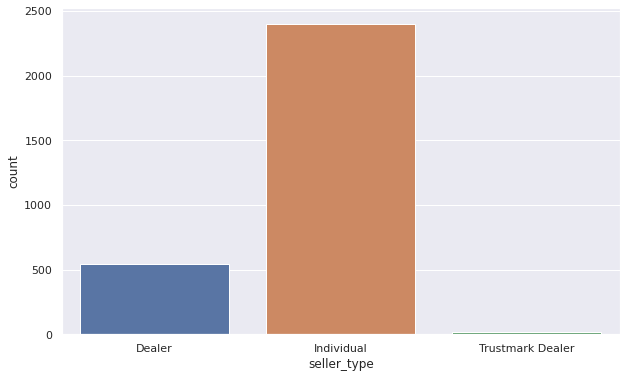

In [ ]:
#seller type
sns.countplot(car_dekho_df_mod['seller_type'])
plt.show()

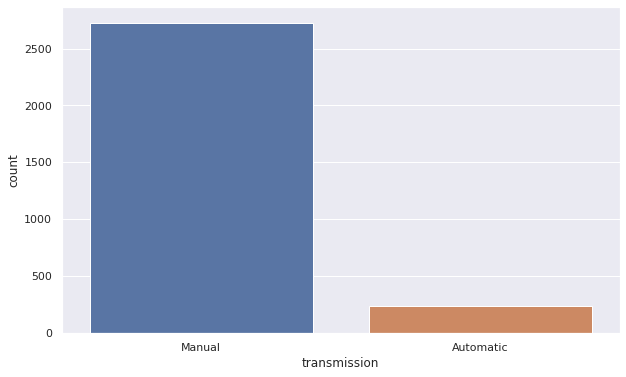

In [ ]:
#transmission
sns.countplot(car_dekho_df_mod['transmission'])
plt.show()

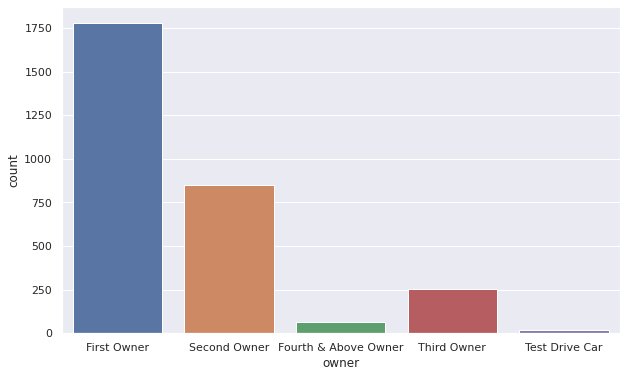

In [ ]:
#owner
sns.countplot(car_dekho_df_mod['owner'])
plt.show()

**Bi-variate Analysis:**

Text(0.5, 1.0, 'km_driven v/s selling_price')

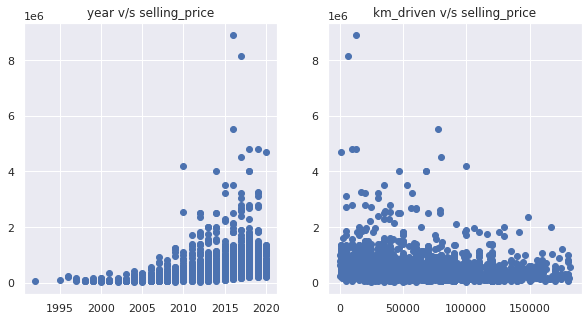

In [ ]:
#checking the relationship between the numerical features!

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))

#scatter plot 1
ax1.scatter(x=car_dekho_df_mod['year'],y= car_dekho_df_mod['selling_price'])
ax1.set_title('year v/s selling_price')

#scatter plot 2
ax2.scatter(x=car_dekho_df_mod['km_driven'], y=car_dekho_df_mod['selling_price']) 
ax2.set_title('km_driven v/s selling_price')

Inferences:

1.   With the increase in the year the selling price tends to increase effectively!
2.   With more the km driven by a car the selling price tends to decrease!



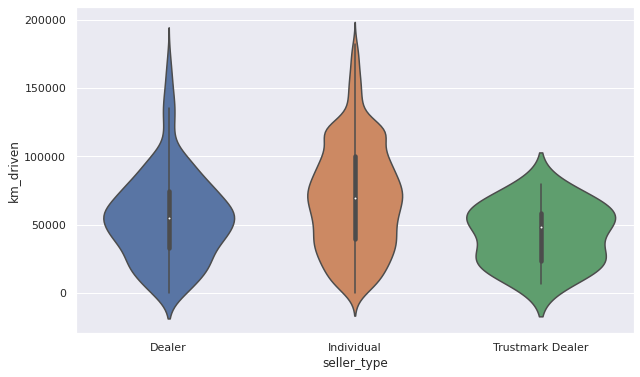

In [ ]:
#km_driven vs owner
ax= sns.violinplot(x='seller_type',y='km_driven',data=car_dekho_df_mod)

The individual seller type exhibits to have more km driven to around 55k kms followed by dealers.

Text(0.5, 1.0, 'Seller_Type v/s Selling_Price')

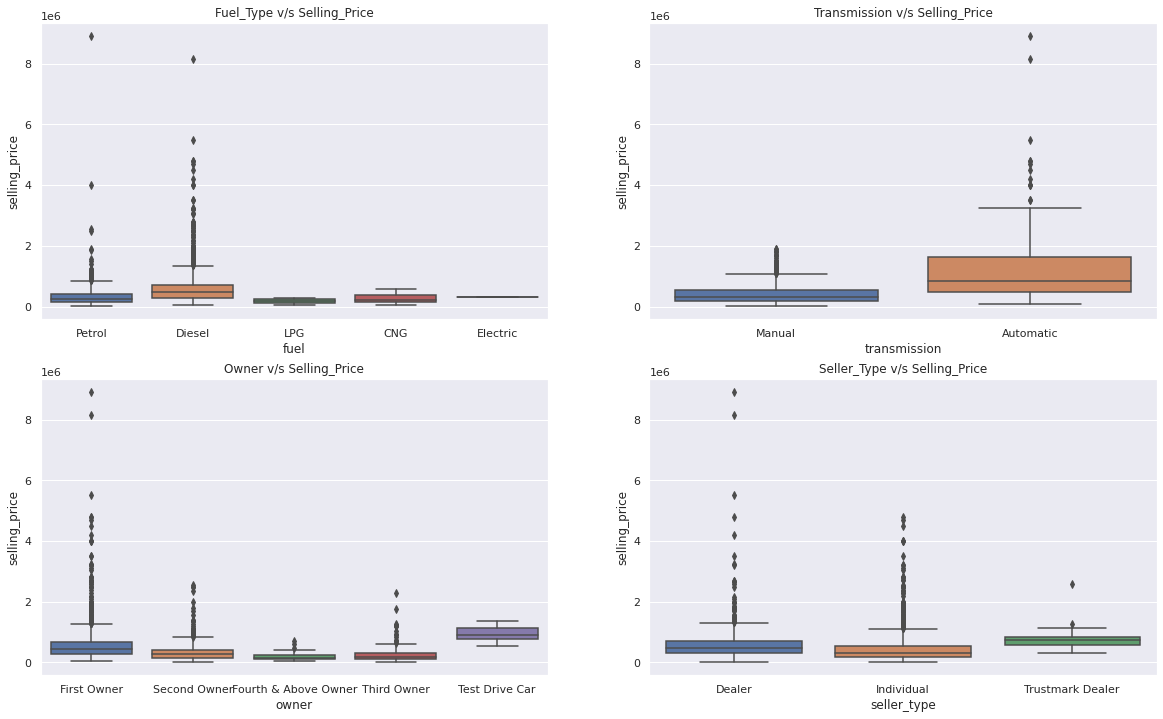

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(20,12))

sns.boxplot(x=car_dekho_df_mod.fuel,y=car_dekho_df_mod.selling_price,ax=axes[0][0])
axes[0][0].set_title('Fuel_Type v/s Selling_Price')

sns.boxplot(x=car_dekho_df_mod.transmission,y=car_dekho_df_mod.selling_price,ax=axes[0][1])
axes[0][1].set_title('Transmission v/s Selling_Price')

sns.boxplot(x=car_dekho_df_mod.owner,y=car_dekho_df_mod.selling_price,ax=axes[1][0])
axes[1][0].set_title('Owner v/s Selling_Price')

sns.boxplot(x=car_dekho_df_mod.seller_type,y=car_dekho_df_mod.selling_price,ax=axes[1][1])
axes[1][1].set_title('Seller_Type v/s Selling_Price')

Inferences:

1.   Diesel being the most expensive fuel type and holds significance with selling price followed by petrol.
2.   Automatic transmission is more with selling price.
3. Test Drive cars seems to be more expensive followed by First Owner and Second Owner cars.
4. Dealers are selling the cars at a more price than individual sellers.




Let's see what can be done with the car names and understand few inferences on them!

In [ ]:
car_dekho_df_mod['company'] = car_dekho_df_mod['name'].str.split(" ",expand=True)[0]
car_dekho_df_mod['company'].value_counts()

Maruti           920
Hyundai          517
Mahindra         272
Tata             250
Ford             201
Honda            185
Chevrolet        123
Toyota           122
Renault           87
Volkswagen        79
Nissan            40
Skoda             39
Fiat              26
Datsun            22
Audi              21
BMW               20
Mercedes-Benz     16
Land               5
Jaguar             4
Mitsubishi         4
Volvo              4
Jeep               3
MG                 2
Ambassador         2
OpelCorsa          2
Daewoo             1
Isuzu              1
Force              1
Kia                1
Name: company, dtype: int64

Text(0, 0.5, 'SP')

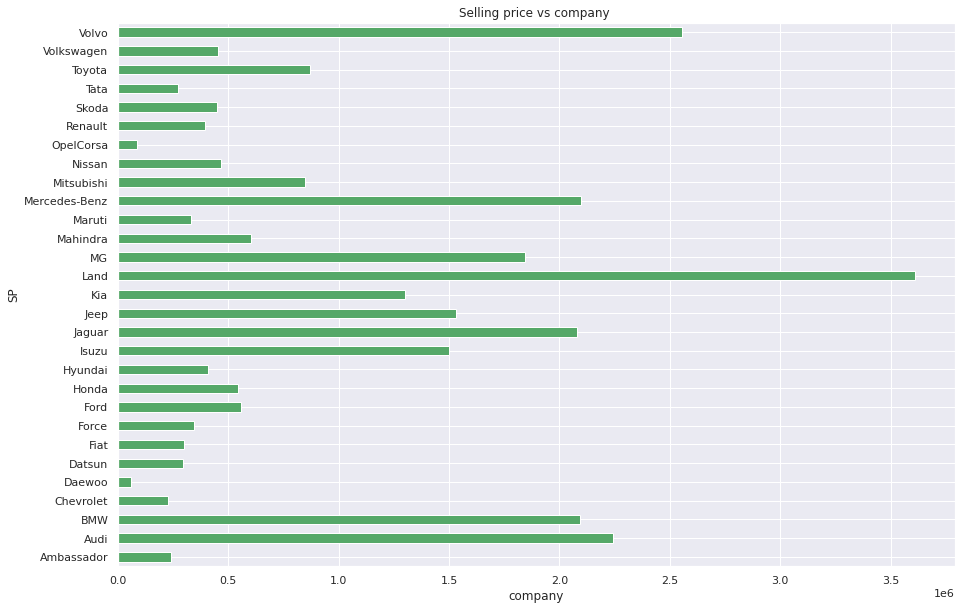

In [ ]:
plt.figure(figsize=(15,10))
car_dekho_df_mod.groupby('company')['selling_price'].mean().plot(kind='barh',color='g')
plt.title('Selling price vs company ')
plt.xlabel('company')
plt.ylabel('SP')

So, we can observe that **Land rover** has put the highest selling price followed by **Volvo** and **Audi**

In [ ]:
car_dekho_df_mod.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
26,Maruti Ciaz VXi Plus,2015,585000,24000,Petrol,Dealer,Manual,First Owner,Maruti
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner,Hyundai
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,Diesel,Individual,Manual,Second Owner,Chevrolet
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner,Jaguar
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner,Mercedes-Benz


**Multivariate Analysis:**

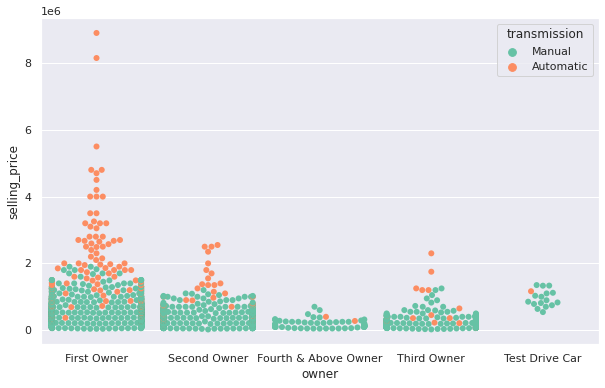

In [ ]:
ax = sns.swarmplot(x="owner", y="selling_price",hue='transmission',dodge=False,size=6,palette='Set2',data=car_dekho_df_mod)

Inferences:

1.   The First Owner cars constitutes the highest selling price with more manual transmission type with the increase in selling price followed by second Owner cars.



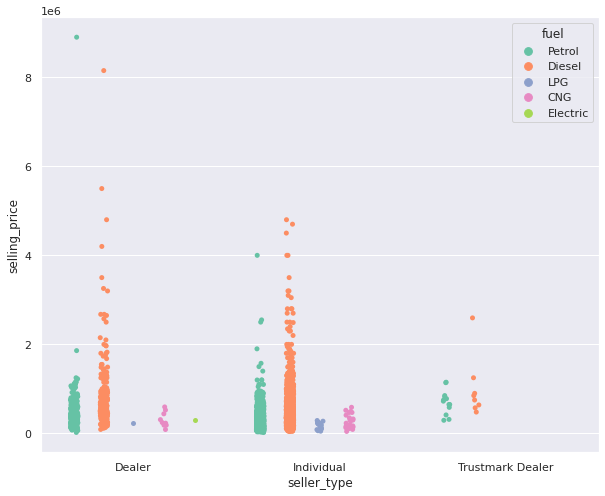

In [ ]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='seller_type',y='selling_price',hue='fuel',dodge=True,data=car_dekho_df_mod,palette='Set2')

Inferences:


1.   There's more likely of **petrol** fuel type cars with the highest selling price followed by **Diesel**, **CNG** , LPG(very less) and negligible to no significant increase in selling price for electric fuel type!
2.   Seller type **Dealer** have most likely sold cars with all the major fuel types followed by **individual** seller type.



**Let's check out the top models(cars)!**

In [ ]:
car_dekho_df_mod.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
26,Maruti Ciaz VXi Plus,2015,585000,24000,Petrol,Dealer,Manual,First Owner,Maruti
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner,Hyundai
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,Diesel,Individual,Manual,Second Owner,Chevrolet
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner,Jaguar
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner,Mercedes-Benz


In [ ]:
#finding the top models with the highest selling prices!
car_model_tops= car_dekho_df_mod.loc[car_dekho_df_mod.groupby('company')['selling_price'].idxmax()].sort_values(by='selling_price',ascending=False)
car_model_tops1=car_model_tops[['name','year','selling_price','company']]
car_model_tops1.rename(columns={'name':'Model'}, inplace=True)
car_model_tops1.head()

,Model,year,selling_price,company
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,Audi
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,Mercedes-Benz
3453,BMW 5 Series 520d Luxury Line,2018,4800000,BMW
4047,Volvo XC 90 D5 Inscription BSIV,2017,4500000,Volvo
3875,Land Rover Range Rover 4.4 Diesel LWB Vogue SE,2010,4200000,Land


Model **Audi RS7** is the highest sold cars in the year 2016 followed by Mercedes-Benz S-Class & BMW 5 Series.

**Top cars by highest avg selling price over the years:**

<Figure size 1440x432 with 0 Axes>

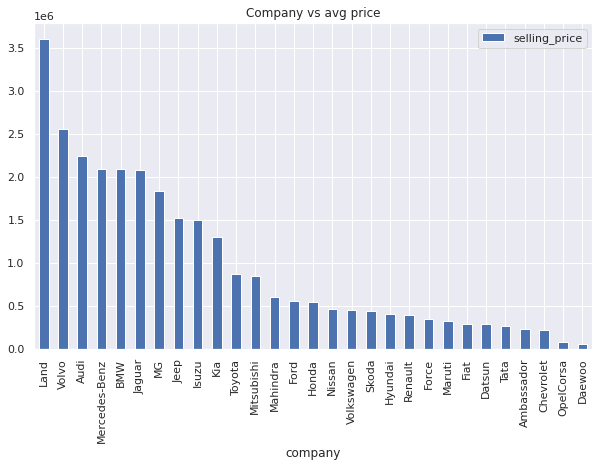

In [ ]:
plt.figure(figsize=(20, 6))

cars_df = pd.DataFrame(car_dekho_df_mod.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
cars_df.plot.bar()
plt.title('Company vs avg price')
plt.show()

--> Top sold cars are mostly **Land Rover** (highest) followed by Volvo, Audi, Mercedes-Benz & BMW. 

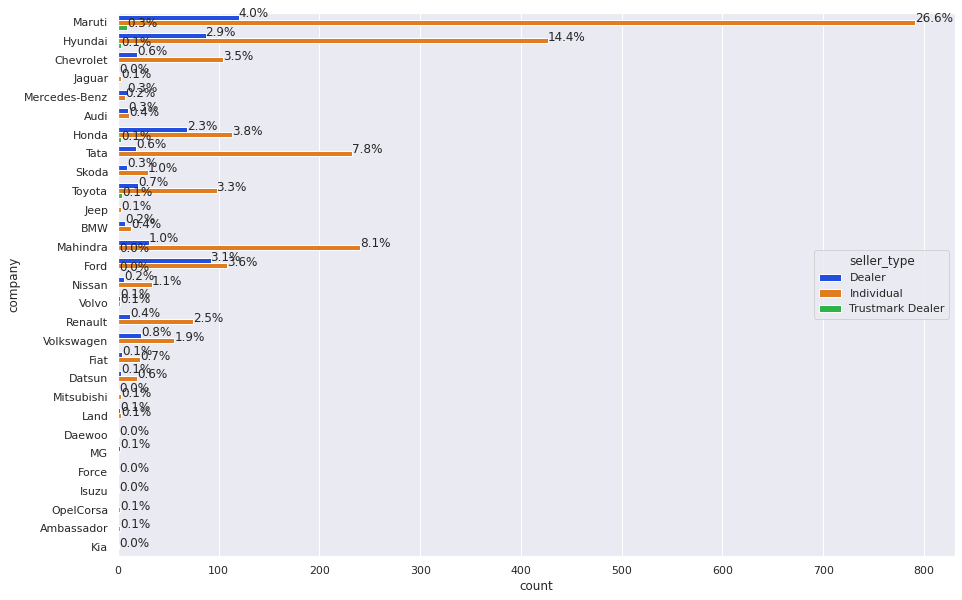

In [ ]:
f,ax = plt.subplots(figsize=(15,10))
ax= sns.countplot(y='company',hue='seller_type',data = car_dekho_df_mod,palette= 'bright')

total = len(car_dekho_df_mod['company'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)  
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

Inferences:
1. **Maruti** tops as the highest sold cars followed by Hyundai & Mahindra.
2. All the top expensive cars were sold very less around 1-4% of the total counts in every year.
3. Most of the cars were sold by **individual** seller_type followed by Dealers.

# **Data Preparation**

In [ ]:
car_dekho_df_mod_copy1 = car_dekho_df_mod.copy()

In [ ]:
car_dekho_df_mod_copy1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
26,Maruti Ciaz VXi Plus,2015,585000,24000,Petrol,Dealer,Manual,First Owner,Maruti
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner,Hyundai
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,Diesel,Individual,Manual,Second Owner,Chevrolet
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner,Jaguar
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner,Mercedes-Benz


In [ ]:
#label encoding
encoders_nums = {"fuel":{"Diesel":0,"Petrol":1,"CNG":2,"LPG":3,"Electric":4},
                 "seller_type":{"Individual":0,"Dealer":1,"Trustmark Dealer":2},
                 "transmission":{"Manual": 0, "Automatic": 1},
                 "owner":{"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4,"Test Drive Car":5}
                 }
car_dekho_df_mod_copy1 = car_dekho_df_mod_copy1.replace(encoders_nums)

In [ ]:
car_dekho_df_mod_copy1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
26,Maruti Ciaz VXi Plus,2015,585000,24000,1,1,0,1,Maruti
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,0,1,0,1,Hyundai
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,0,0,0,2,Chevrolet
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,0,1,1,1,Jaguar
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,0,1,1,1,Mercedes-Benz


In [ ]:
features = numeric_features.copy()
features.extend(['fuel','seller_type','transmission','owner'])
features

['selling_price',
 'year',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner']

In [ ]:
#Data Standardization : putting all the features on the same scale
from scipy.stats import zscore
X = car_dekho_df_mod_copy1[features].apply(zscore)
X

,selling_price,year,km_driven,fuel,seller_type,transmission,owner
26,0.232390,0.475052,-1.133016,0.842332,1.926720,-0.298511,-0.694977
27,1.452277,1.414089,-1.632500,-0.926922,1.926720,-0.298511,-0.694977
28,-0.157573,0.005533,-0.896418,-0.926922,-0.476623,-0.298511,0.572886
29,2.992131,0.240292,-1.027861,-0.926922,1.926720,3.349959,-0.694977
30,1.912234,0.005533,-0.212913,-0.926922,1.926720,3.349959,-0.694977
...,...,...,...,...,...,...,...
4335,-0.117579,0.240292,0.339149,-0.926922,-0.476623,-0.298511,0.572886
4336,-0.117579,0.240292,0.339149,-0.926922,-0.476623,-0.298511,0.572886
4337,-0.717521,-0.933504,0.418015,0.842332,-0.476623,-0.298511,0.572886
4338,0.792338,0.709811,0.602035,-0.926922,-0.476623,-0.298511,-0.694977


In [ ]:
y=np.log10(car_dekho_df_mod_copy1['selling_price'])

In [ ]:
# # using min-max scaler to scale the numerical features between 0 & 1.
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# data_scaled = pd.DataFrame(X)
# data_scaled[numerical_columns] = scaler.fit_transform(data_scaled[numerical_columns])

# **Modelling**

-> Linear Regression:

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2376, 7)
(594, 7)


In [ ]:
# #data standardization!
# from sklearn.preprocessing import StandardScaler
# sc= StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_train=pd.DataFrame(X_train,columns=data_preprocessed.columns)

# X_test=sc.fit_transform(X_test)
# X_test=pd.DataFrame(X_test,columns=data_preprocessed.columns)

In [ ]:
#model building using a regression obj

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train) #Linear Regressssion fit
reg.score(X_train, y_train)

0.817009833298507

In [ ]:
reg.coef_

array([ 0.16906418,  0.16654363,  0.00906477, -0.06191221,  0.02050184,
        0.02168721, -0.00891752])

In [ ]:
len(reg.coef_)

7

In [ ]:
reg.intercept_

5.525489432825024

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([5.72946331, 5.35942688, 5.83212527, 5.53871344, 5.46570374,
       5.13126208, 5.5696841 , 5.44216646, 5.23705517, 5.17294152,
       5.46145763, 5.55806309, 5.51936918, 5.80162533, 5.15079656,
       5.66856111, 5.52547429, 5.93314648, 5.64386453, 5.19795751,
       5.80300997, 5.48780762, 5.83856827, 5.20219288, 5.75326323,
       5.44707066, 6.10546009, 4.83039883, 5.97552049, 5.43081549,
       5.45180503, 5.59036416, 4.89854757, 5.78018276, 5.28144821,
       5.43315433, 5.87187898, 5.64406824, 5.30194398, 5.46561481,
       5.61391487, 5.39765311, 5.57294273, 4.93967432, 5.10524573,
       5.67502134, 5.5356172 , 5.21347731, 5.58150168, 5.68898016,
       5.48148586, 5.6932905 , 5.72782655, 5.73423424, 5.6397269 ,
       5.71518086, 5.22865929, 5.61050237, 5.56267506, 5.42847474,
       5.48924908, 5.40121107, 5.71222201, 4.98933448, 5.94786476,
       5.65434831, 5.66930854, 5.45855267, 5.51499025, 5.56978874,
       5.22175916, 5.42210776, 5.21209227, 5.91147562, 5.27863

In [ ]:
# comparing the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace=True,drop=True)
df

,Actual,Predicted
0,5.822822,5.729463
1,5.505150,5.359427
2,5.812913,5.832125
3,5.633468,5.538713
4,5.681241,5.465704
...,...,...
589,5.908485,5.801744
590,5.792392,5.716318
591,5.491362,5.593598
592,5.423246,5.506145


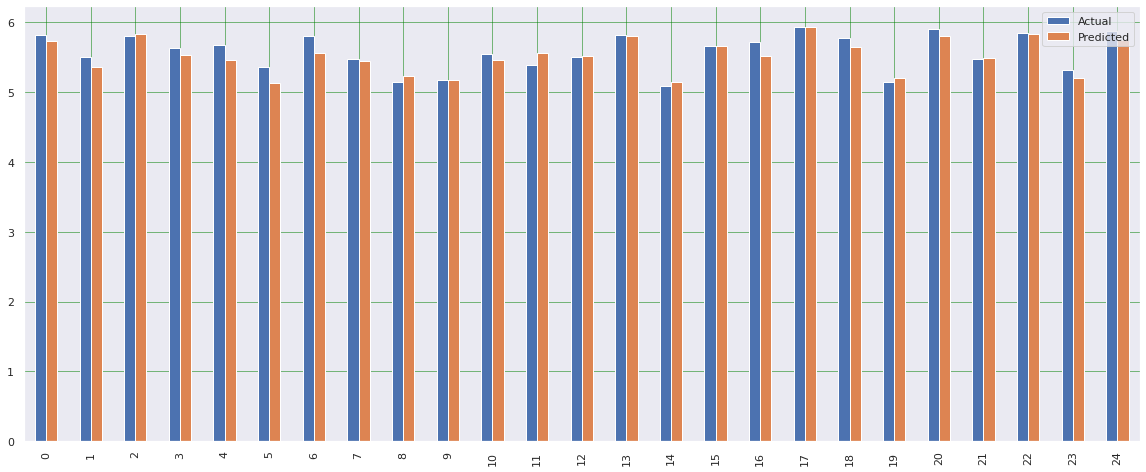

In [ ]:
#Showing the difference between the actual and predicted value

df1 = df.head(25)
df1.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Metrics:**

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.10966157663062524
Mean Squared Error: 0.02236709705098129
Root Mean Squared Error: 0.1495563340383191
r2_score: 0.8116981714917355


# **Regularized Regression:**

**--> Lasso**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.8170093310634385

In [ ]:
#coefficients of the model with lasso regularization
lasso.coef_

array([ 0.16905386,  0.16641786,  0.00885866, -0.06189441,  0.02040774,
        0.02159715, -0.00883138])

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.02386409325213864


In [ ]:
y_pred_lasso = y_pred_lasso = lasso_regressor.predict(X_test)

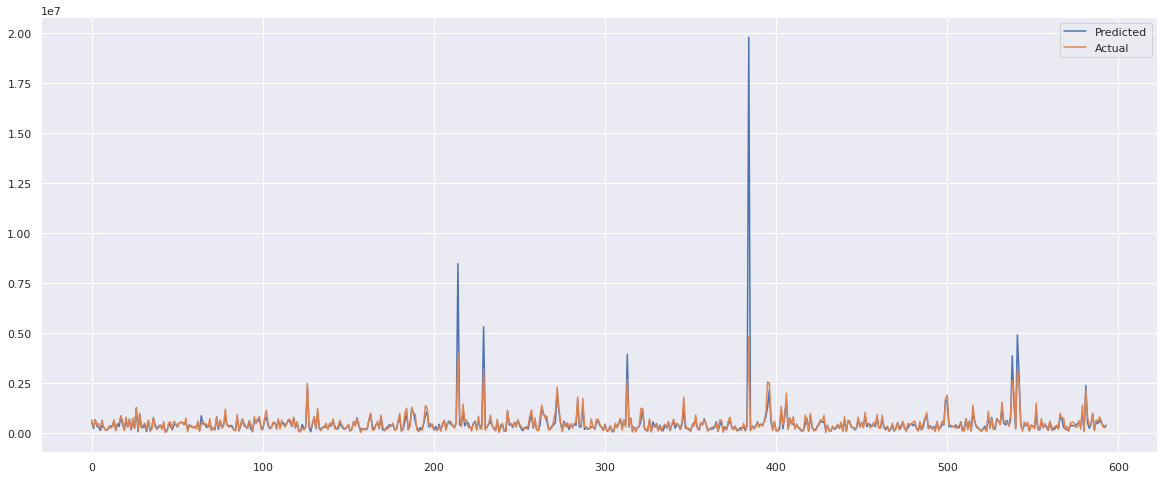

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

The model has fitted well in lasso as well! 

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso_regressor.predict(X_test))))
print('r2_score:', metrics.r2_score(y_test, lasso_regressor.predict(X_test)))

Root Mean Squared Error: 0.1496446397619689
r2_score: 0.8114757397453604


The r2 value also clearly tells that the model is good and has also fitted very well!

**--> Ridge**

In [ ]:
from sklearn.linear_model import RidgeCV,Ridge

alphas = 10**np.linspace(10,-2,100)*0.5

ridgecv = RidgeCV(alphas = alphas,normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.03527401155359316

In [ ]:
rr = Ridge(alpha = ridgecv.alpha_, normalize = True)
rr.fit(X_train, y_train)

Ridge(alpha=0.03527401155359316, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
rr.score(X_train, y_train)

0.8165047834324322

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rr.predict(X_test))))
print('r2_score:', metrics.r2_score(y_test, rr.predict(X_test)))

Root Mean Squared Error: 0.1502834156551309
r2_score: 0.8098628282960935


**Elastic Net:**

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, y_train)

0.7651240528305107

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, elasticnet.predict(X_test))))
print('r2_score:', metrics.r2_score(y_test, elasticnet.predict(X_test)))

Root Mean Squared Error: 0.17236432287339648
r2_score: 0.7498850391042201


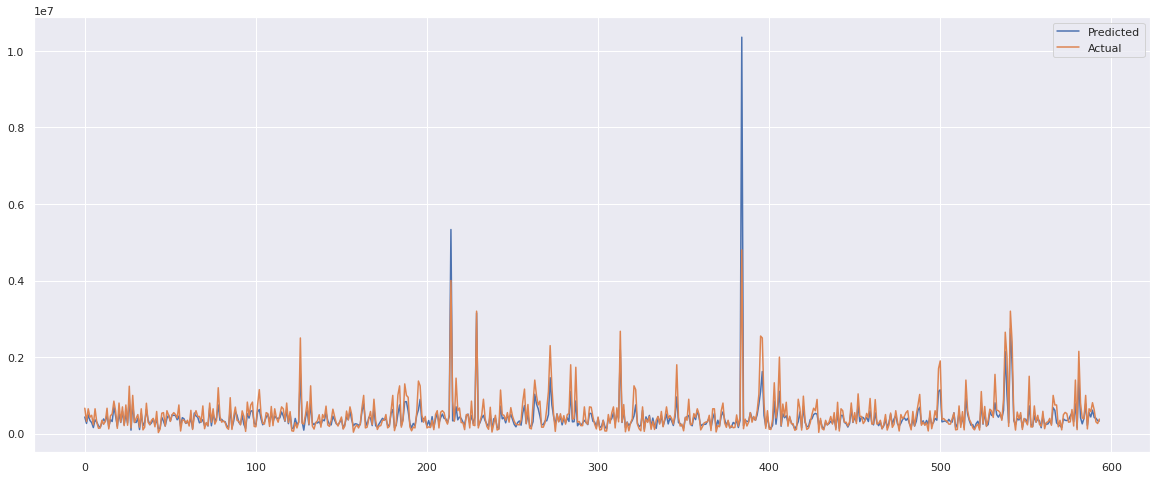

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(10**(y_pred_en))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Conclusions: 

*   **Linear Regression** & out of the 3 Regularized regression models **Lasso** have worked well and fitted the model well.

In [ ]:
#we have reached the end of our analysis!
#This notebook is contributed by Sudip Roy.